In [2]:
#SALES DATA ANALYSIS

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
df=pd.read_csv("Linear Regression Sale Prediction.csv")

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [23]:
df.shape

(8523, 12)

In [24]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

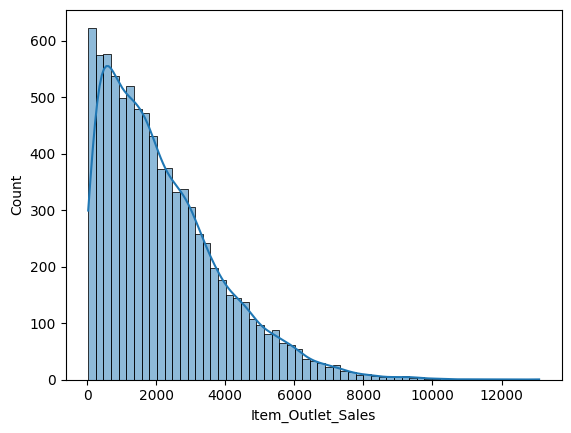

In [25]:
sns.histplot(df['Item_Outlet_Sales'],kde=True)

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

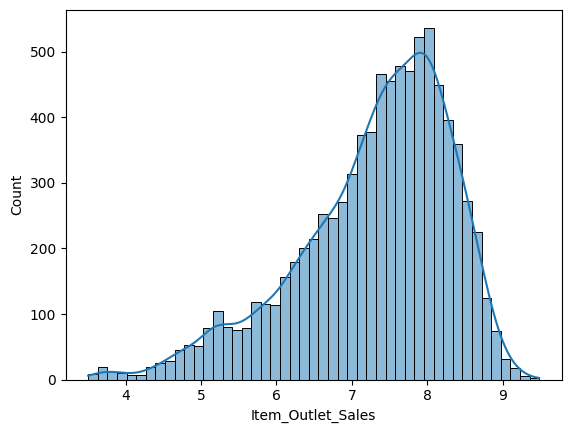

In [26]:
sns.histplot(np.log(df['Item_Outlet_Sales']),kde=True)

In [27]:
#df['Item_Outlet_Sales']=np.log(df['Item_Outlet_Sales'])

In [28]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [30]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [31]:
o_size_mode=df['Outlet_Size'].mode()[0]
o_size_mode

'Medium'

In [32]:
df['Outlet_Size']=df['Outlet_Size'].fillna('medium')

In [33]:
df.isnull().sum()/len(df)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [45]:
num_cols=df.select_dtypes(include=['int','float'])
num_cols

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [35]:
cat_cols=df.select_dtypes(include=['O']).columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [36]:
df.drop(['Item_Identifier'],axis=1,inplace=True)

In [46]:
cor=num_cols.corr()

<Axes: >

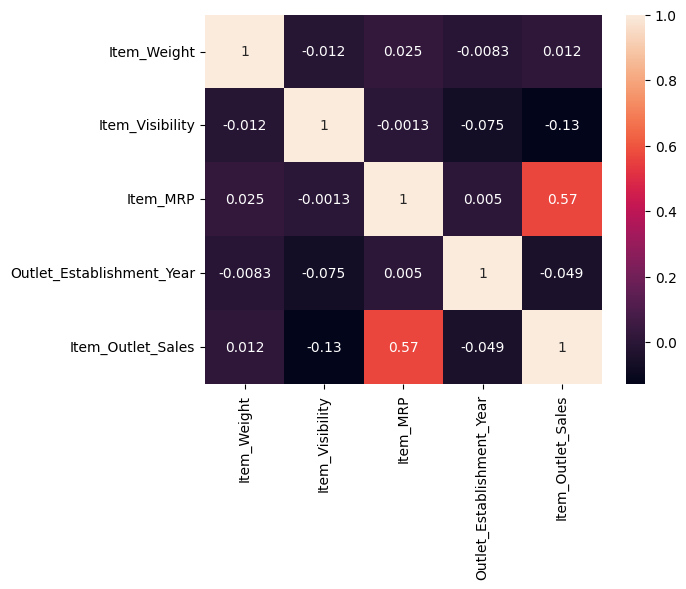

In [47]:
sns.heatmap(cor,annot=True)

In [48]:
cat_cols=df.select_dtypes(include=['O']).columns
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [49]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [50]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace("low fat",'Low Fat')

In [52]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace("LF",'Low Fat')

In [53]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace("reg",'Regular')

In [61]:
df['Item_Fat_Content'].unique()

array([0, 1])

In [57]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le=LabelEncoder()


In [60]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])

In [62]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [63]:
df['Item_Type']=le.fit_transform(df['Item_Type'])

In [64]:
df['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [65]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [66]:
df.drop(['Outlet_Identifier'],axis=1,inplace=True)

In [67]:
df['Outlet_Size'].unique()

array(['Medium', 'medium', 'High', 'Small'], dtype=object)

In [68]:
df['Outlet_Size']=df['Outlet_Size'].str.replace("medium","Medium")

In [69]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [70]:
map_size={"Small":0,'Medium':1,'High':2}

In [71]:
df['Outlet_Size']=df['Outlet_Size'].map(map_size)

In [72]:
df['Outlet_Size'].unique()

array([1, 2, 0])

In [73]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [76]:
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])

In [74]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [77]:
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])

<Axes: >

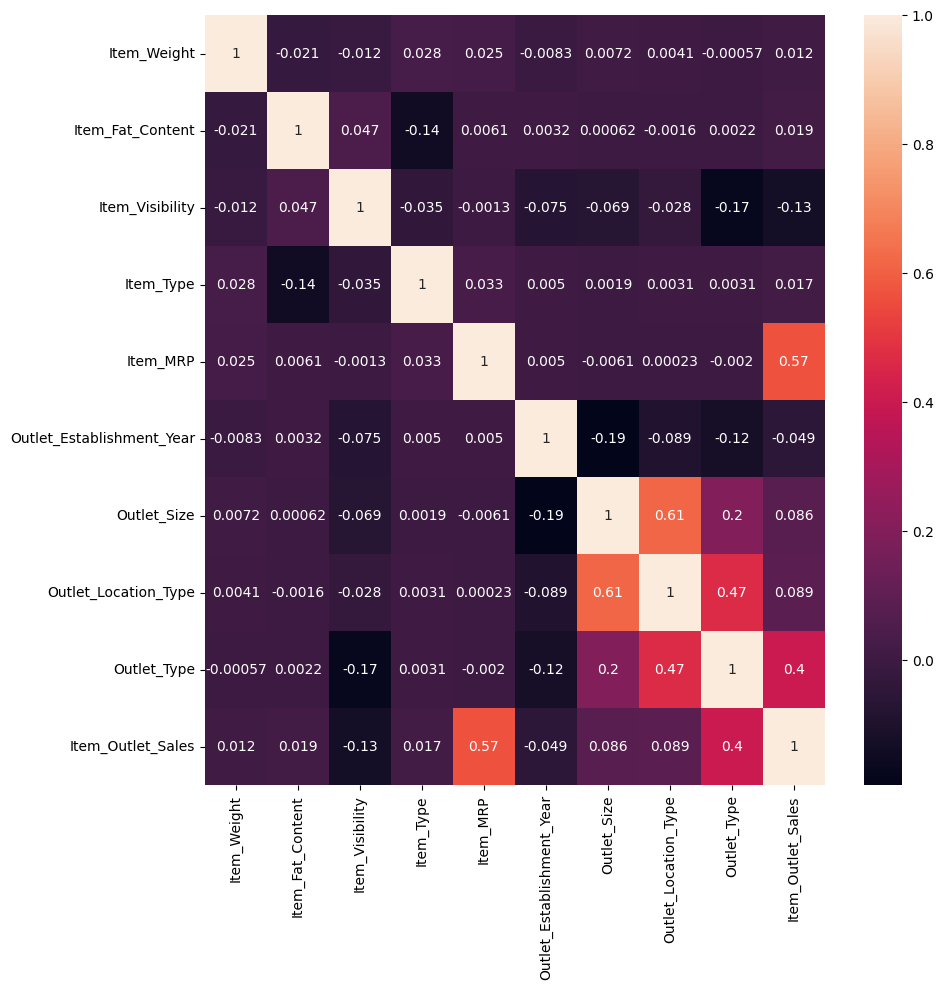

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [80]:
#Features or Independent Varibale

In [81]:
X=df.iloc[:,:-1]

In [84]:
#Dependent Variable or Target Variable
y=df.iloc[:,-1]

In [86]:
#Now Dividing Data into Training data and testing Data

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=True)

In [89]:
X_train.shape,y_train.shape

((6818, 9), (6818,))

In [90]:
X_test.shape,y_test.shape

((1705, 9), (1705,))

In [91]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc=StandardScaler()

In [95]:
X_train=sc.fit_transform(X_train)

In [97]:
X_test=sc.fit_transform(X_test)

In [99]:
# Model Building

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
#Building a model
lr=LinearRegression()

In [102]:
#Training a Model
lr.fit(X_train,y_train)

LinearRegression()

In [108]:
#prediction on Train data
y_train_pred=lr.predict(X_train)

In [106]:
#Prediction on Test data
y_test_pred=lr.predict(X_test)

In [112]:
from sklearn.metrics import r2_score,mean_squared_error
def metrics_lr(y_actual,y_pred):
    print("MSE:-",round(mean_squared_error(y_actual,y_pred),2))
    print("RMSE:-",round(np.sqrt(mean_squared_error(y_actual,y_pred)),2))
    print("R2 Score:-",round(r2_score(y_actual,y_pred),2))


In [113]:
print("Train Data")
metrics_lr(y_train,y_train_pred)
print("Test Data")
metrics_lr(y_test,y_test_pred)

Train Data
MSE:- 1426614.01
RMSE:- 1194.41
R2 Score:- 0.51
Test Data
MSE:- 1459429.36
RMSE:- 1208.07
R2 Score:- 0.51
